In [1]:
import os
from crnn import CRNN
import torch
import torch.nn.functional as F
import torchvision
import dataset
from torch.autograd import Variable
import utils
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nh = 100
alphabet = '0123456789'
nclass = len(alphabet) + 1
nc = 1
mynet = CRNN(32, nc, nclass, nh)

In [3]:
converter = utils.strLabelConverter(alphabet)

In [4]:
mynet.load_state_dict(torch.load('/home/node/Documents/express_recognition/data/model_save/telephone/tele3.pth'))
mynet = mynet.cuda()
mynet = mynet.eval()

In [12]:
root = '/home/node/Documents/express_recognition/data/validation/'
img_root = root + 'telephone_data_3'
txt_root = root + 'telephone_label_validation_3.txt'
dset = dataset.Dataset(img_root=img_root, txt_root=txt_root)
print('All Valid Image number is {}'.format(len(dset)))

All Valid Image number is 293


In [8]:
def decode(x):
    i = 0
    text = ''
    while i < len(x)-1:
        temp = x.cpu().data[i]
        if temp == 0:
            i += 1
        else:
            text += str(temp-1)
            if temp == x.cpu().data[i+1]:
                i += 2
            else:
                i += 1
    if i == len(x)-1:
        if x.cpu().data[i] != 0:
            text += str(x.cpu().data[i]-1)
    return text

In [9]:
def get_acc_new():
    transformer = dataset.resizeNormalize((256, 32))
    num_correct = 0
    new_correct = 0
    for j, img_path in enumerate(dset.image):
        image = Image.open(img_path).convert('L')
        image = transformer(image).cuda()
        image = image.view(1, *image.size())
        image = Variable(image)

        preds = mynet(image) # sequence_length x batch_size x n_classes
        _, preds = preds.max(2) # sequence_length x batch_size x 1
        preds = preds.view(-1) # sequence_length x 1
        preds_size = torch.IntTensor([preds.size(0)])
        raw_pred = converter.decode(preds.data, preds_size, raw=True)
        sim_pred = converter.decode(preds.data, preds_size, raw=False)
        my_pred = decode(preds)
        if sim_pred == dset.label[j]:
            num_correct += 1
        else:
            print(img_path.split('/')[-1])
            print('old error')
            pic = Image.open(img_path)
            plt.imshow(pic)
            plt.show()
            print('{} => {}'.format(raw_pred, sim_pred))
#         if my_pred == dset.label[j]:
#             new_correct += 1
#         else:
#             print('new error')
#             pic = Image.open(img_path)
#             plt.imshow(pic)
#             plt.show()
#             print('{} => {}'.format(raw_pred, my_pred))
#         print('*'*10)
    print('old total number is: {}'.format(num_correct))
#     print('new total number is: {}'.format(new_correct))
    print('old total accuracy: {:.6f}'.format(num_correct/len(dset)))
#     print('new total accuracy: {:.6f}'.format(new_correct/len(dset)))

2_21_0.jpg
old error


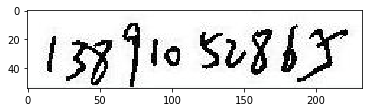

11--3--8-991100-55-22-8-66-35--- => 138910528635
3_60_0.jpg
old error


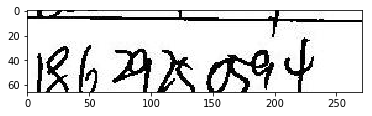

1188-66-2--9---5-1-55-81-44----- => 18629515814
3_80_0.jpg
old error


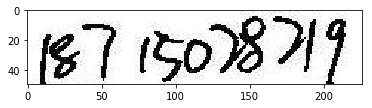

11-88-77-11--5--0--7-8--7-11-9-- => 18715078719
3_90_0.png
old error


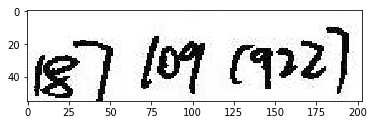

11885-77--1--0-99-----9-2--2-77- => 18571099227
6_140_0.jpg
old error


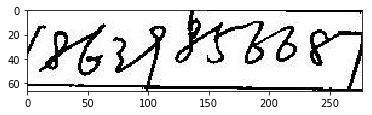

1-8--66-3--99-88--5--8--3--8--77 => 18639858387
7_160_0.jpg
old error


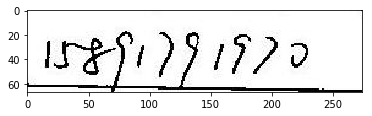

11-55-8-991177-9-11-9-22-00----- => 15891791920
7_171_0.jpg
old error


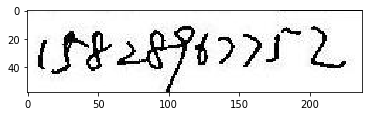

11-5--8--2-88-9-6-2--2-1---2---- => 15828962212
7_180_0.jpg
old error


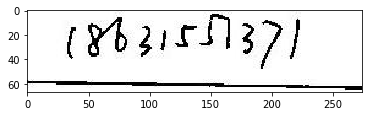

11----8-6--31155--7-3377-1------ => 1863157371
9_00_0.jpg
old error


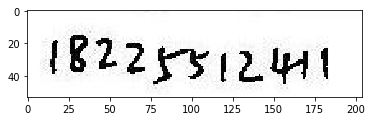

11--8--2--2-55--511-22-44-111--- => 1822551241
10_41_0.jpg
old error


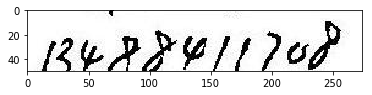

11-3-44--2--8--4411-11-7-0--8--- => 13428411708
10_50_0.jpg
old error


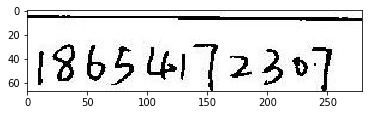

11-8--6--3--4411-7--2--3-00-7--- => 18634172307
11_71_0.jpg
old error


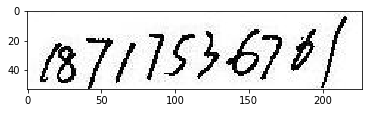

11-88-7-11-77-5--3--6-77--8-11-- => 18717536781
12_91_0.jpg
old error


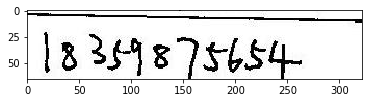

11-88-3---9-88-7-5-6-55-4------- => 1839875654
13_101_0.jpg
old error


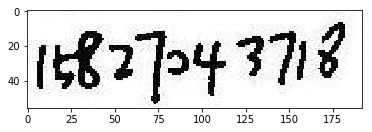

11-5-88-22-77-2-444--3-77-1-88-- => 15827243718
15_140_0.jpg
old error


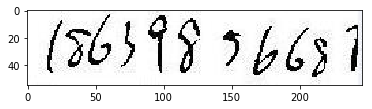

11--8-66-3--9-88---9--6--6-88-77 => 18639896687
15_150_0.jpg
old error


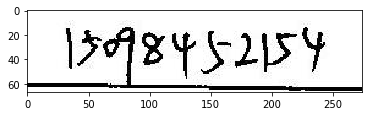

-111-3--09-88-44-55-2-155--4---- => 13098452154
16_160_0.jpg
old error


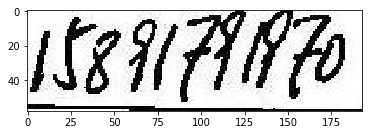

11-55-88--9-11-7--9911---7--8--- => 1589179178
18_190_0.jpg
old error


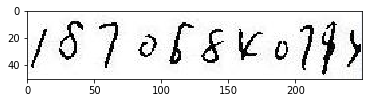

11-88--77--0--6--8--44-00-7-99-- => 1870684079
5_81_0_0.png
old error


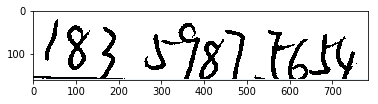

11-88-33---55-9988-7--7--6-5-44- => 18359877654
5_90_0_0.png
old error


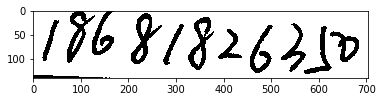

11-88-6---8-11-88-22-66-3311-00- => 18681826310
5_91_0_0.png
old error


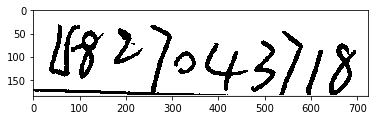

1-5--8--2--77-0--4-4-33-7-11-8-- => 158270443718
6_101_0_0.png
old error


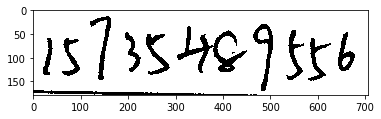

11-5--7-33-55---9-8--99-5--5-6-- => 15735989556
6_110_0_0.png
old error


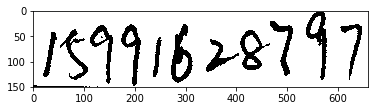

11-55-9--9-11-8--2--88-77-99-77- => 15991828797
7_131_0_0.png
old error


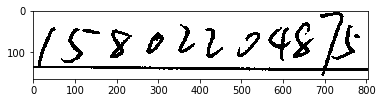

11-55---8--0--2--2--2--4-8-77-5- => 15802224875
9_171_0_0.png
old error


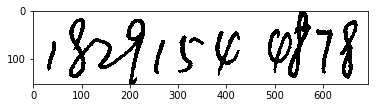

11-88-22-9-11-5--44---44-9-7-88- => 18291544978
9_180_0_0.png
old error


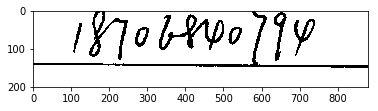

11---8877-0-4-4444-077-9-44----- => 1870440794
9_181_0_0.png
old error


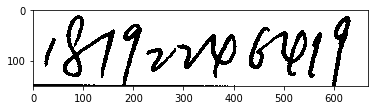

11-88-7--9-2--2--44--6--4-11-9-- => 18792246419
10_200_0_0.png
old error


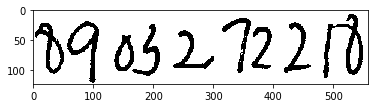

-0--99--0--3-22----7-22-22-11-9- => 0903272219
14_41_0_0.png
old error


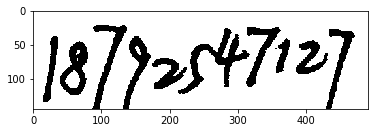

11-88-77-9--22-5--4-77---22-77-- => 1879254727
15_70_0_0.png
old error


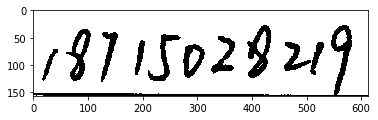

11--8-77-11-5--0--2--9--2-11-9-- => 18715029219
17_221_0_0.png
old error


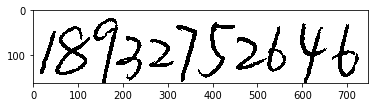

11-83-99-3-22-77-5--2-66--4--66- => 183932752646
dhn_1_10_0.jpg
old error


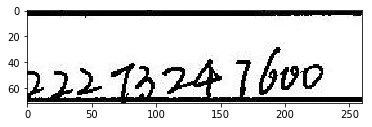

2--2-22-9--3--2-44--7-66-0-0---- => 22293247600
dhn_1_20_0.png
old error


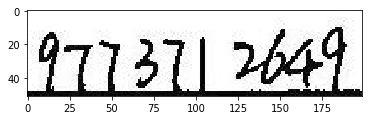

-99-77-77-33-77111--2--6--4--9-- => 9773712649
dhn_2_11_0.png
old error


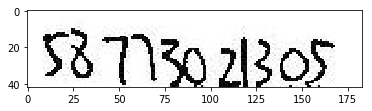

155-88--7--7-3--0-21113--0-55--- => 158773021305
dhn_3_00_0.jpg
old error


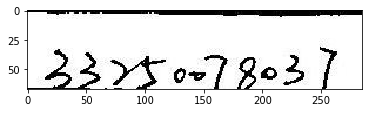

--33-33-22-55-0--77-8--0-3--7--- => 3325078037
dhn_4_00_0.jpg
old error


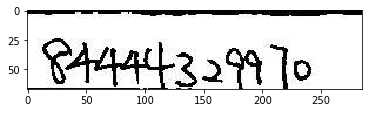

--88-4-44-4-4-33-2-999-77-0----- => 8444432970
dhn_4_01_0.jpg
old error


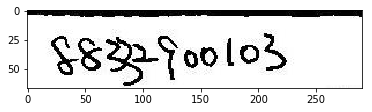

---8-88-8-8--900001100-3-------- => 888890103
dhn_4_10_0.jpg
old error


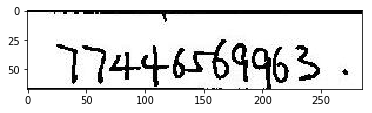

---77-7--4-44-6--66-9-466-3----- => 7744669463
dhn_5_01_0.jpg
old error


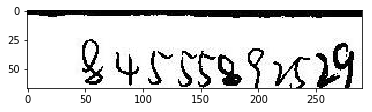

-----88--44-5-5555-8-9-225522-9- => 8455892529
dhn_5_11_0.jpg
old error


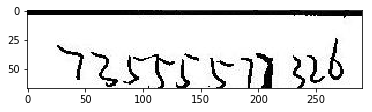

----7--3-55-5--5--5-7-77-3---6-- => 7355557736
dhn_5_21_0.png
old error


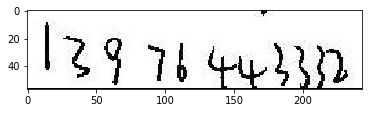

11--33-99--77-6--44--4-3--33-22- => 1397644332
dhn_6_01_0.png
old error


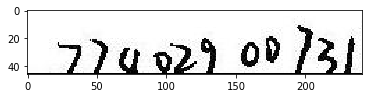

---77-77--110-22-9--00-8-77-3-11 => 77102908731
dhn_6_10_0.jpg
old error


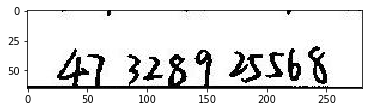

---44-77-3-22-8-99-22555-6-88--- => 4732892568
dhn_6_20_0.jpg
old error


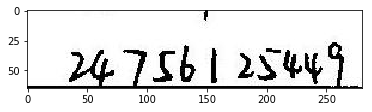

----2-44-77-55-6-11-2-55-444-99- => 2475612549
dhn_8_01_0.png
old error


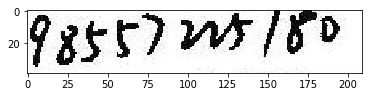

99-8--5-55-77--2-4--5-11-8--0--- => 98557245180
dhn_8_11_0.jpg
old error


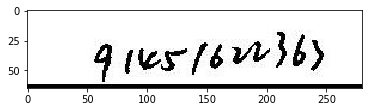

------9911-4-551166-2-23366-2--- => 91451622362
dhn_9_00_0.png
old error


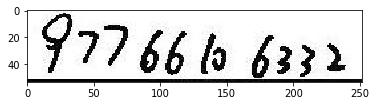

--9--7--7--6--6-1----66-3-3--2-- => 9776616332
dhn_11_00_0.png
old error


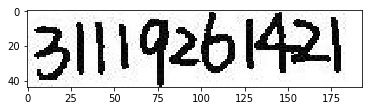

--3-111111-99-22-62--1-4--2--1-- => 3192621421
dhn_12_00_0.png
old error


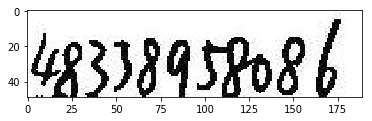

-4--8-3--3-8--4-55-8--0-88--6--- => 48338458086
dhn_14_21_0.jpg
old error


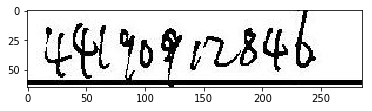

--4--44--9-0-9-1--2-88-4--6----- => 4490912846
dhn_15_01_0.jpg
old error


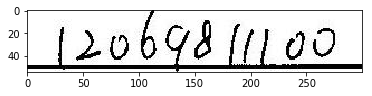

-11--22-0--6--9-8811--11-0--0--- => 1206981100
dhn_16_00_0.png
old error


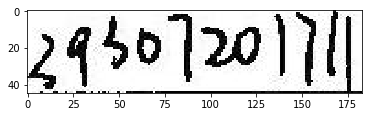

-3--99--3--0--77-22--0-71-771111 => 39307207171
dhn_16_01_0.png
old error


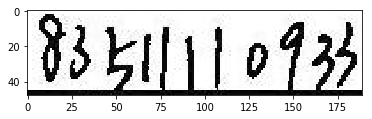

-88-33--5-1--111-11--00-99-33-3- => 8351110933
dhn_16_11_0.png
old error


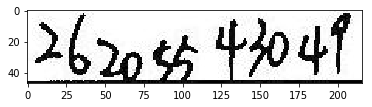

-22-66-2--0-6--5--44-3--0-44-99- => 26206543049
dhn_16_20_0.png
old error


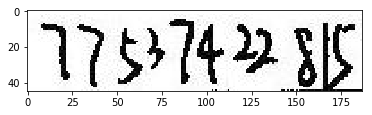

--77-77--5--3-77-4--3-22--81155- => 77537432815
dhn_18_00_0.png
old error


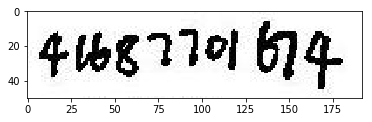

--4---66-8--7--7-00---6-77-44--- => 468770674
dhn_18_10_0.png
old error


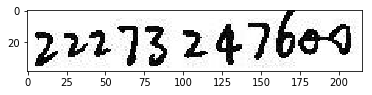

-2--2-22-7--3--22-44-77-6--6-6-- => 22273247666
dhn_20_20_0.jpg
old error


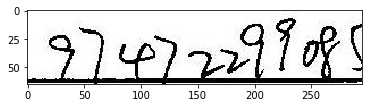

---9--7--444-7--22-2-99-9-0-88-0 => 97472299080
dhn_21_00_0.jpg
old error


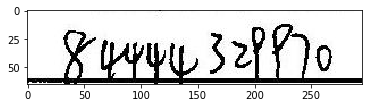

----8--4-4444----33-29---77-0--- => 84432970
dhn_21_01_0.png
old error


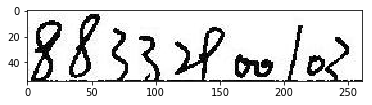

-8---8--3--3--22-9--0-0011-0-2-- => 88332900102
dhn_22_01_0.jpg
old error


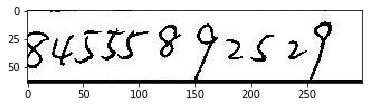

8-44-5--555-88--99-2--5--2-99--- => 8455892529
dhn_22_10_0.jpg
old error


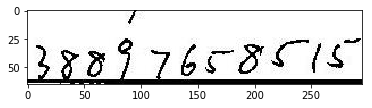

-3-88-0--9--7--6-55--8-55-11-5-- => 38097658515
dhn_23_10_0.png
old error


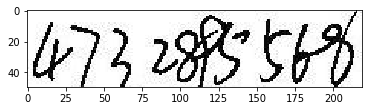

1144-77-33--2-88-9-5---5-66----- => 1473289556
dhn_23_20_0.jpg
old error


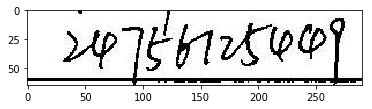

---22-44-77-5-6-7722-5-44-44-9-- => 24756725449
dhn_27_01_0.png
old error


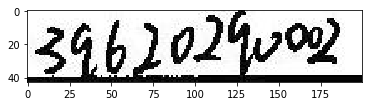

--3--9--6--2--0--2--9-22-0--33-- => 3962029203
dhn_31_00_0.png
old error


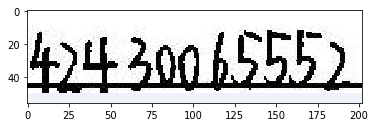

44-22-44--3-00-2--6-55-5--5--2-- => 42430265552
dhn_32_01_0.png
old error


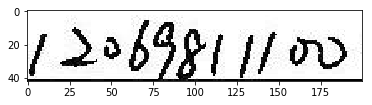

11--22-00-6--9-8-1111--1-0-7-2-- => 12069811072
dhn_32_10_0.jpg
old error


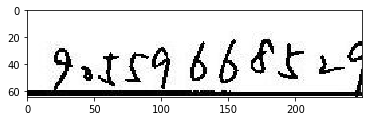

--99-2-5--5-99--6--6--8-55--2--9 => 92559668529
dhn_32_20_0.jpg
old error


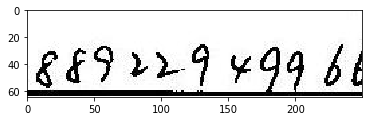

-8--8--9-22-22--9--44-99-99-66-4 => 88922949964
dhn_33_01_0.png
old error


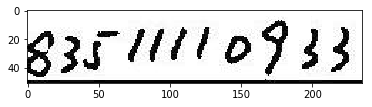

-8-33-5--1-1111-11-00--99-33-33- => 8351110933
dhn_33_10_0.png
old error


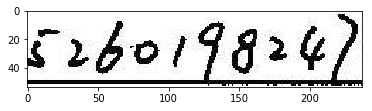

-5--2--66--0-11-99--8--22-44-77- => 5260198247
dhn_33_20_0.jpg
old error


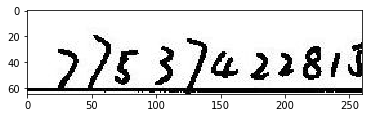

---22-77-5--33-77-44-22-2--811-8 => 27537422818
dhn_34_10_0.jpg
old error


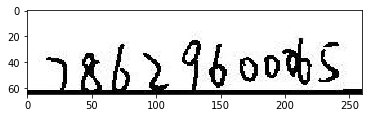

--77-88-66-22--9--6-0--0-66-55-- => 7862960065
old total number is: 220
old total accuracy: 0.750853


In [13]:
get_acc_new()

In [ ]:
def get_acc():
    transformer = dataset.resizeNormalize((256, 32))
    num_correct = 0
    for i, img_path in enumerate(dset.image):
        image = Image.open(img_path).convert('L')
        image = transformer(image).cuda()
        image = image.view(1, *image.size())
        image = Variable(image)

        preds = mynet(image) # sequence_length x batch_size x n_classes
        _, preds = preds.max(2) # sequence_length x batch_size x 1
        preds = preds.view(-1) # sequence_length x 1
        preds_size = torch.IntTensor([preds.size(0)])
        raw_pred = converter.decode(preds.data, preds_size, raw=True)
        sim_pred = converter.decode(preds.data, preds_size, raw=False)
        if sim_pred == dset.label[i]:
            num_correct += 1
        else:
            pic = Image.open(img_path)
            plt.imshow(pic)
            plt.show()
            print('{} => {}'.format(raw_pred, sim_pred))
    print('total accuracy: {:.6f}'.format(num_correct/len(dset)))

In [ ]:
get_acc()

In [9]:
def show_result(img_name):
    root = '/home/node/Documents/express_recognition/data/validation/telephone_data_3'
    img_path = os.path.join(root, img_name)
    transformer = dataset.resizeNormalize((256, 32))
    image = Image.open(img_path).convert('L')
    image = transformer(image).cuda()
    image = image.view(1, *image.size())
    image = Variable(image)
    
    mynet.eval()
    preds = mynet(image) # sequence_length x batch_size x n_classes
    _, preds = preds.max(2) # sequence_length x batch_size x 1
    preds = preds.view(-1) # sequence_length x 1
    preds_size = torch.IntTensor([preds.size(0)])
    raw_pred = converter.decode(preds.data, preds_size, raw=True)
    sim_pred = converter.decode(preds.data, preds_size, raw=False)
    pic = Image.open(img_path)
    plt.imshow(pic)
    plt.show()
    print('{} => {}'.format(raw_pred, sim_pred))

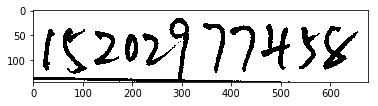

11-55-2200-2-99-77-77--4-55-88-- => 15202977458


In [10]:
show_result('6_120_0_0.png')

In [ ]:
root = '/home/sherlock/Documents/express_recognition/data/validation/telephone'
img_path = os.path.join(root, '17_210_1_1.png')
transformer = dataset.resizeNormalize((128, 32))
image = Image.open(img_path).convert('L')
image = transformer(image).cuda()
image = image.view(1, *image.size())
image = Variable(image)

mynet.eval()
preds = mynet(image) # preds sequence_length x batch_size x n_classes

In [ ]:
preds = preds.squeeze(1)

In [ ]:
preds = F.softmax(preds)
prob, label = torch.max(preds, 1)

In [ ]:
tele = ''
for i in range(label.size(0)):
    if prob[i].cpu().data[0] > 0.9:
        if label[i].cpu().data[0] == 0:
            tele += '-'
        else:
            tele += str(label[i].cpu().data[0]-1)

In [ ]:
for i in range(preds.size(0)):
    label = preds.cpu().data[i, :]
    label = label.numpy()
    plt.plot(label)
    plt.title('{}'.format(i))
    plt.show()

In [ ]:
all_file_name = os.listdir('/home/sherlock/Documents/express_recognition/data/validation/telephone/')

for img in all_file_name:
    show_result(img)
    print()